# Data Wrangling Homework

In the spirit of warming up for final projects, this weeks homework will be somewhat open-ended. Actually, it will more like closed-ended and open-middled...

Different doctors with different backgrounds, trained in different places, etc., might behave differently. In other words, one doctor might have various biases relative to another. We hope not, at least in critical situations, but doctors are people too.

Your job is to determine whether the 4 doctors in our data set are behaving essentially the same with respect to measuring clump thickness, bland chromatin, and diagnosis of tumor type, or whether any one of them seems to be different. 

The submission should be a pdf that makes your case as though to a boss/hospital administrator; it should make the case in enough detail to be convincing, but not in such detail that your boss will hate you. For example, one doctor-to-doctor comparison can be described in some detail, but the rest can be summarized with "Similar comparisons were made for ..."

Your final conclusion should be whether 1) everything seems okay with respect to the doctors or 2) if there are any red flags that might warrent further scrutiny.

Do the analysis with an open mind. It's not good to enter an analysis with a pre-conceived notion of what you may or may not find.

In [1]:
import pandas as pd # importing the library.

In [2]:
bcd = pd.read_csv('./data/breast_cancer_data.csv') # . for current directory that were in.
bcd

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,1,3.0,1.0,1,benign,Dr. Doe
1,1002945,5.0,4.0,4,5,7,10,3.0,2.0,1,benign,Dr. Smith
2,1015425,3.0,1.0,1,1,2,2,3.0,1.0,1,benign,Dr. Lee
3,1016277,6.0,8.0,8,1,3,4,3.0,7.0,1,benign,Dr. Smith
4,1017023,4.0,1.0,1,3,2,1,3.0,1.0,1,benign,Dr. Wong
...,...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3.0,1.0,1,1,3,2,1.0,1.0,1,benign,Dr. Lee
695,841769,2.0,1.0,1,1,2,1,1.0,1.0,1,benign,Dr. Smith
696,888820,5.0,10.0,10,3,7,3,8.0,10.0,2,malignant,Dr. Lee
697,897471,4.0,8.0,6,4,3,4,10.0,6.0,1,malignant,Dr. Lee


In [142]:
bcd.head(19) # looking at the top 20 of the data. 

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,1000025,5.0,1.0,1,1,2,3.0,1.0,1,benign,Doe
1,1002945,5.0,4.0,4,5,7,3.0,2.0,1,benign,Smith
2,1015425,3.0,1.0,1,1,2,3.0,1.0,1,benign,Lee
3,1016277,6.0,8.0,8,1,3,3.0,7.0,1,benign,Smith
4,1017023,4.0,1.0,1,3,2,3.0,1.0,1,benign,Wong
5,1017122,8.0,10.0,10,8,7,9.0,7.0,1,malignant,Smith
7,1018561,2.0,1.0,2,1,2,3.0,1.0,1,benign,Smith
8,1033078,2.0,1.0,1,1,2,1.0,1.0,5,benign,Smith
9,1033078,4.0,2.0,1,1,2,2.0,1.0,1,benign,Doe
10,1035283,1.0,1.0,1,1,1,3.0,1.0,1,benign,Doe


In [143]:
bcd.tail(19) # bottom 20 of the data. 

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
680,1369821,10.0,10.0,10,10,5,10.0,10.0,7,malignant,Lee
681,1371026,5.0,10.0,10,10,4,5.0,6.0,3,malignant,Wong
682,1371920,5.0,1.0,1,1,2,3.0,2.0,1,benign,Wong
683,466906,1.0,1.0,1,1,2,1.0,1.0,1,benign,Lee
684,466906,1.0,1.0,1,1,2,1.0,1.0,1,benign,Wong
685,534555,1.0,1.0,1,1,2,1.0,1.0,1,benign,Doe
686,536708,1.0,1.0,1,1,2,1.0,1.0,1,benign,Doe
687,566346,3.0,1.0,1,1,2,2.0,3.0,1,benign,Lee
688,603148,4.0,1.0,1,1,2,1.0,1.0,1,benign,Smith
689,654546,1.0,1.0,1,1,2,1.0,1.0,8,benign,Lee


In [3]:
bcd.shape # checking the shape of the data. 

(699, 12)

In [7]:
bcd.columns # index of the names of the columns in bcd. 

Index(['patient_id', 'clump_thickness', 'cell_size_uniformity',
       'cell_shape_uniformity', 'marginal_adhesion', 'single_ep_cell_size',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class',
       'doctor_name'],
      dtype='object')

In [10]:
bcd['patient_id'] = bcd['patient_id'].astype('string') # making patient ID a string 

In [11]:
bcd['bare_nuclei'] = bcd['bare_nuclei'].replace('?', '') # removing the question marks from bare nuclei.

In [13]:
bcd.isna().sum() # finding how many missing in each column.

patient_id               0
clump_thickness          1
cell_size_uniformity     1
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bare_nuclei              2
bland_chromatin          4
normal_nucleoli          1
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [14]:
bcd = bcd.dropna(how = 'all')

In [15]:
bcd = bcd.dropna(how = 'any')

In [18]:
dr_names = bcd['doctor_name']
print(dr_names)

0        Dr. Doe
1      Dr. Smith
2        Dr. Lee
3      Dr. Smith
4       Dr. Wong
         ...    
694      Dr. Lee
695    Dr. Smith
696      Dr. Lee
697      Dr. Lee
698     Dr. Wong
Name: doctor_name, Length: 690, dtype: object


In [19]:
split_dr_names = dr_names.str.split() 
split_dr_names

0        [Dr., Doe]
1      [Dr., Smith]
2        [Dr., Lee]
3      [Dr., Smith]
4       [Dr., Wong]
           ...     
694      [Dr., Lee]
695    [Dr., Smith]
696      [Dr., Lee]
697      [Dr., Lee]
698     [Dr., Wong]
Name: doctor_name, Length: 690, dtype: object

In [20]:
surnames = split_dr_names.str[1] # avoiding redudancy of "Dr.".
surnames

0        Doe
1      Smith
2        Lee
3      Smith
4       Wong
       ...  
694      Lee
695    Smith
696      Lee
697      Lee
698     Wong
Name: doctor_name, Length: 690, dtype: object

In [21]:
bcd['doctor_name'] = surnames

In [22]:
bcd['bare_nuclei']

0       1
1      10
2       2
3       4
4       1
       ..
694     2
695     1
696     3
697     4
698     5
Name: bare_nuclei, Length: 690, dtype: object

In [26]:
bcd['bare_nuclei'] = pd.to_numeric(bcd['bare_nuclei']) # making the column numerical. 

In [27]:
bcd.dtypes What # checking the type again to double check that bare_nuclei changes

patient_id               string[python]
clump_thickness                 float64
cell_size_uniformity            float64
cell_shape_uniformity             int64
marginal_adhesion                 int64
single_ep_cell_size               int64
bare_nuclei                     float64
bland_chromatin                 float64
normal_nucleoli                 float64
mitoses                           int64
class                            object
doctor_name                      object
dtype: object

In [28]:
bcd.isna()

,patient_id,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class,doctor_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False,False


In [29]:
bcd.isna().sum()

patient_id                0
clump_thickness           0
cell_size_uniformity      0
cell_shape_uniformity     0
marginal_adhesion         0
single_ep_cell_size       0
bare_nuclei              16
bland_chromatin           0
normal_nucleoli           0
mitoses                   0
class                     0
doctor_name               0
dtype: int64

In [30]:
bcd = bcd.dropna(axis = 1, how = 'any') # drop columns rather than rows

In [32]:
bcd.isna().sum() # nothing missing!

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [33]:
print(bcd) # getting an overview of everything.

    patient_id  clump_thickness  cell_size_uniformity  cell_shape_uniformity  \
0      1000025              5.0                   1.0                      1   
1      1002945              5.0                   4.0                      4   
2      1015425              3.0                   1.0                      1   
3      1016277              6.0                   8.0                      8   
4      1017023              4.0                   1.0                      1   
..         ...              ...                   ...                    ...   
694     776715              3.0                   1.0                      1   
695     841769              2.0                   1.0                      1   
696     888820              5.0                  10.0                     10   
697     897471              4.0                   8.0                      6   
698     897471              4.0                   8.0                      8   

     marginal_adhesion  single_ep_cell_

In [34]:
bcd = bcd.fillna(0)

In [35]:
bcd.isna().sum()

patient_id               0
clump_thickness          0
cell_size_uniformity     0
cell_shape_uniformity    0
marginal_adhesion        0
single_ep_cell_size      0
bland_chromatin          0
normal_nucleoli          0
mitoses                  0
class                    0
doctor_name              0
dtype: int64

In [36]:
bcd.dtypes

patient_id               string[python]
clump_thickness                 float64
cell_size_uniformity            float64
cell_shape_uniformity             int64
marginal_adhesion                 int64
single_ep_cell_size               int64
bland_chromatin                 float64
normal_nucleoli                 float64
mitoses                           int64
class                            object
doctor_name                      object
dtype: object

Here is a Boxplot of Clump Thickness by Doctor:


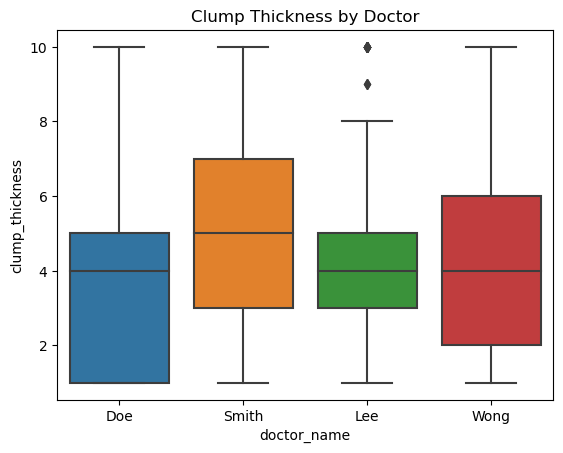

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x = 'doctor_name', y = 'clump_thickness', data = bcd) # making a boxplot of clump thickness by doctor 
plt.title('Clump Thickness by Doctor')

print("Here is a Boxplot of Clump Thickness by Doctor:") 

Here is a Boxplot of Bland Chromatin by Doctor:


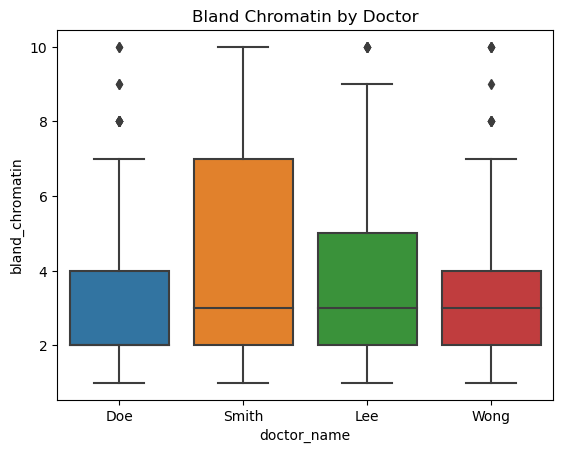

In [167]:
sns.boxplot(x = 'doctor_name', y = 'bland_chromatin', data = bcd) # bland chromatin boxplot
plt.title('Bland Chromatin by Doctor')

print("Here is a Boxplot of Bland Chromatin by Doctor:")

Here is a Count of Tumor Type Diagnosis by Doctor:


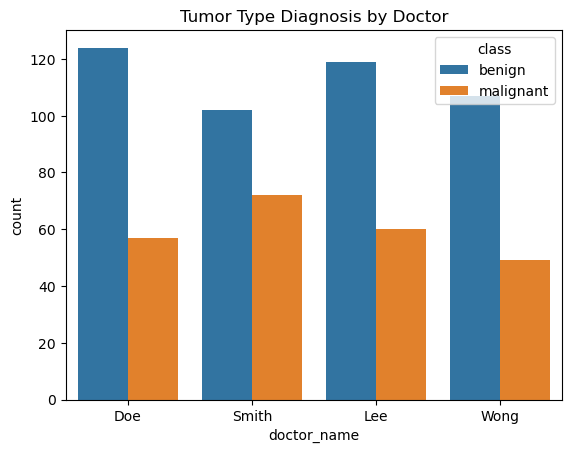

In [166]:
sns.countplot(x = 'doctor_name', hue = 'class', data = bcd)
plt.title('Tumor Type Diagnosis by Doctor')

print("Here is a Count of Tumor Type Diagnosis by Doctor:")

In [165]:
selected_columns = ['clump_thickness', 'bland_chromatin', 'doctor_name']
means_by_doctor = bcd[selected_columns].groupby('doctor_name').mean()

print("Comparing The Means of Clump Thickness and Bland Chromatin for Each Doctor:")
print(means_by_doctor)

Comparing The Means of Clump Thickness and Bland Chromatin for Each Doctor:
             clump_thickness  bland_chromatin
doctor_name                                  
Doe                 4.209945         3.088398
Lee                 4.206704         3.435754
Smith               4.862069         3.833333
Wong                4.448718         3.435897


In [164]:
selected_columns = ['class', 'doctor_name']
count_by_doctor = bcd[selected_columns].groupby(['doctor_name', 'class']).size().unstack(fill_value = 0)

print("Count of Tumor Class for Each Doctor:")
print(count_by_doctor)

Count of Tumor Class for Each Doctor:
class        benign  malignant
doctor_name                   
Doe             124         57
Lee             119         60
Smith           102         72
Wong            107         49


In [162]:
import pandas as pd
selected_columns = ['clump_thickness', 'bland_chromatin', 'class', 'doctor_name']

descriptive_stats_by_doctor = bcd[selected_columns].groupby('doctor_name').describe()

print("Descriptive Statistics for Each Doctor:")
print(descriptive_stats_by_doctor)

Descriptive Statistics for Each Doctor:
            clump_thickness                                                \
                      count      mean       std  min  25%  50%  75%   max   
doctor_name                                                                 
Doe                   181.0  4.209945  3.018482  1.0  1.0  4.0  5.0  10.0   
Lee                   179.0  4.206704  2.507687  1.0  3.0  4.0  5.0  10.0   
Smith                 174.0  4.862069  2.855569  1.0  3.0  5.0  7.0  10.0   
Wong                  156.0  4.448718  2.815384  1.0  2.0  4.0  6.0  10.0   

            bland_chromatin                                                
                      count      mean       std  min  25%  50%  75%   max  
doctor_name                                                                
Doe                   181.0  3.088398  2.206790  1.0  2.0  2.0  4.0  10.0  
Lee                   179.0  3.435754  2.431085  1.0  2.0  3.0  5.0  10.0  
Smith                 174.0  3.833333  2

Text(0.5, 1.0, 'Tumor Type Diagnosis by Doctor')

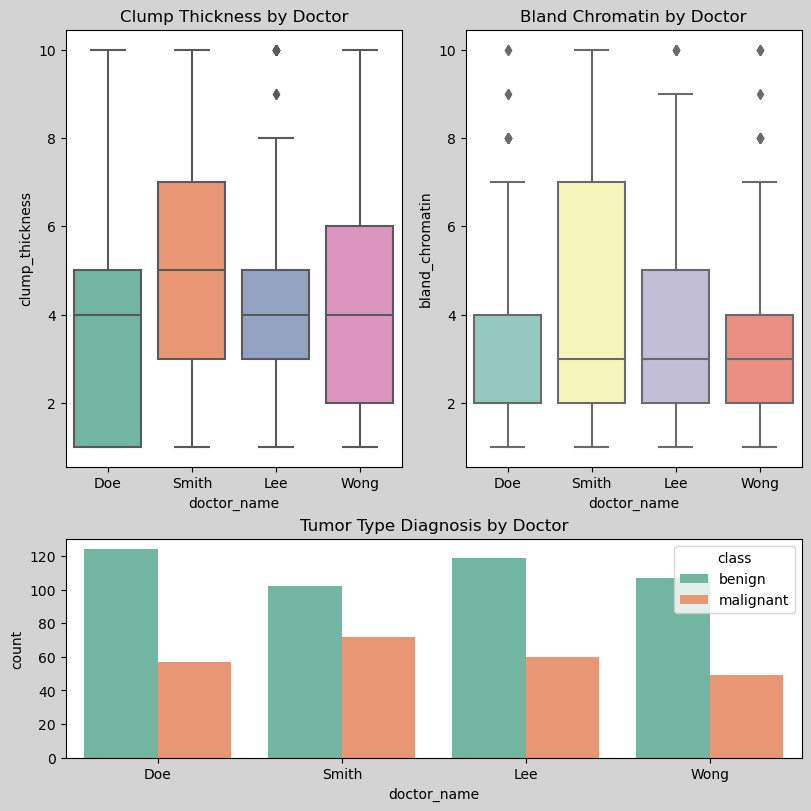

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (8, 8), constrained_layout=True)
fig.set_facecolor('lightgrey')
spec = fig.add_gridspec(2, 2, height_ratios = [3, 1.5])
ax0 = fig.add_subplot(spec[0, 0])

sns.boxplot(x='doctor_name', y = 'clump_thickness', data = bcd, ax = ax0, palette = sns.color_palette('Set2'))
ax0.set_title('Clump Thickness by Doctor')
ax1 = fig.add_subplot(spec[0, 1])

sns.boxplot(x = 'doctor_name', y = 'bland_chromatin', data = bcd, ax = ax1, palette = sns.color_palette('Set3'))
ax1.set_title('Bland Chromatin by Doctor')
ax2 = fig.add_subplot(spec[1, :])

sns.countplot(x = 'doctor_name', hue = 'class', data = bcd, ax = ax2, palette = sns.color_palette('Set2'))
ax2.set_title('Tumor Type Diagnosis by Doctor')

# **Report**
#### The report below explores differences in tumor diagnosis, clump thickness, and bland chromatin. The aim is to improve patient outcomes by improving the diagnosis process. 
##### There are higher cases of bengin tumors than malignant tumor diagnoses across all doctors, this suggests that there is higher prevalance of begnin cases: 

In [157]:
selected_columns = ['class', 'doctor_name']

# Group by 'doctor' and calculate the count of tumor classes
count_by_doctor = bcd[selected_columns].groupby(['doctor_name', 'class']).size().unstack(fill_value = 0)
print("Count of Tumor Class for Each Doctor:")
print(count_by_doctor)

Count of Tumor Class for Each Doctor:
class        benign  malignant
doctor_name                   
Doe             124         57
Lee             119         60
Smith           102         72
Wong            107         49


##### Below is the means for both clump thickness and bland chromatin for all doctors. The results suggest that, the results are relativley similar, but it might be worth discovering why Smith has a higher mean for both. There could be a difference in the population that each doctor sees. Furthermore, Doe has the lowest mean for bland chromatin and a higher standard devation for clump thickness––this suggests that there is a larger variance in the data. It is also important to note that Wong had less patients. Overall, it could be worth it to explore training options for more consistent results. 

In [158]:
import pandas as pd
selected_columns = ['clump_thickness', 'bland_chromatin', 'class', 'doctor_name']

descriptive_stats_by_doctor = bcd[selected_columns].groupby('doctor_name').describe()

print("Descriptive Statistics for Each Doctor:")
print(descriptive_stats_by_doctor)

Descriptive Statistics for Each Doctor:
            clump_thickness                                                \
                      count      mean       std  min  25%  50%  75%   max   
doctor_name                                                                 
Doe                   181.0  4.209945  3.018482  1.0  1.0  4.0  5.0  10.0   
Lee                   179.0  4.206704  2.507687  1.0  3.0  4.0  5.0  10.0   
Smith                 174.0  4.862069  2.855569  1.0  3.0  5.0  7.0  10.0   
Wong                  156.0  4.448718  2.815384  1.0  2.0  4.0  6.0  10.0   

            bland_chromatin                                                
                      count      mean       std  min  25%  50%  75%   max  
doctor_name                                                                
Doe                   181.0  3.088398  2.206790  1.0  2.0  2.0  4.0  10.0  
Lee                   179.0  3.435754  2.431085  1.0  2.0  3.0  5.0  10.0  
Smith                 174.0  3.833333  2

##### Below is two boxplots of clump thickness and bland chromatin as well as tumor diagnosis type. It is helpful to have a visual aid for the descriptive statstics above. 

Figure 1.


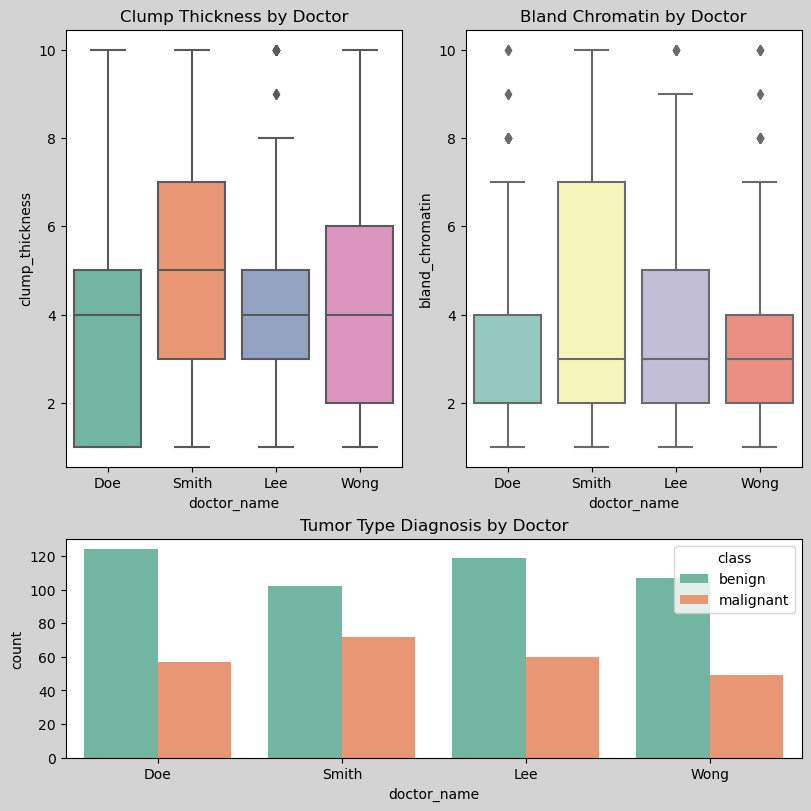

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize = (8, 8), constrained_layout=True)
fig.set_facecolor('lightgrey')
spec = fig.add_gridspec(2, 2, height_ratios = [3, 1.5])
ax0 = fig.add_subplot(spec[0, 0])

sns.boxplot(x='doctor_name', y = 'clump_thickness', data = bcd, ax = ax0, palette = sns.color_palette('Set2'))
ax0.set_title('Clump Thickness by Doctor')
ax1 = fig.add_subplot(spec[0, 1])

sns.boxplot(x = 'doctor_name', y = 'bland_chromatin', data = bcd, ax = ax1, palette = sns.color_palette('Set3'))
ax1.set_title('Bland Chromatin by Doctor')
ax2 = fig.add_subplot(spec[1, :])

sns.countplot(x = 'doctor_name', hue = 'class', data = bcd, ax = ax2, palette = sns.color_palette('Set2'))
ax2.set_title('Tumor Type Diagnosis by Doctor')
print("Figure 1.")